In [14]:
#Yes this is just adapted code from the AI-made normscale, again thank you Claude AI, model Opus 4.0
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Parse
def parse_csv_data(filename=r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\E143_data\1...HEPData-ins375737-v1-csv 2\Table2.csv'):
    """
    Parse the physics data CSV file with proper handling of header comments
    """
    data_rows = []
    headers = []
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Find the header line (last line before data that contains column names)
        data_start = None
        for i, line in enumerate(lines):
            line = line.strip()
            if line and not line.startswith('#'):
                # This should be our header line
                headers = [col.strip() for col in line.split(',')]
                data_start = i + 1
                break
        
        # Parse data rows
        for line in lines[data_start:]:
            line = line.strip()
            if line and not line.startswith('#'):
                # Split by comma and convert to float
                values = [float(val.strip()) for val in line.split(',')]
                data_rows.append(values)
    
    # Create DataFrame
    df = pd.DataFrame(data_rows, columns=headers)
    return df

In [16]:
#Parse Method 2
def read_data_alternative(filename=r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\E143_data\1...HEPData-ins375737-v1-csv 2\Table2.csv'):
    """
    Alternative method using pandas with custom preprocessing
    """
    # Read all lines and filter out comment lines
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Filter out comment lines and find data section
    data_lines = []
    for line in lines:
        line = line.strip()
        if line and not line.startswith('#'):
            data_lines.append(line)
    
    # Create a temporary file-like object from the filtered lines
    from io import StringIO
    data_string = '\n'.join(data_lines)
    
    # Read with pandas
    df = pd.read_csv(StringIO(data_string))
    return df

In [17]:
#Plot def
def plot_g1p_vs_x(data, combine_errors=True):
    """
    Create the G1^P vs x plot with error bars and logarithmic x-axis
    
    Parameters:
    data: pandas DataFrame with the physics data
    combine_errors: bool, whether to combine statistical and systematic errors
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Calculate combined errors if requested
    if combine_errors:
        # Combine statistical and systematic errors in quadrature
        error_upper = np.sqrt(data['stat +']**2)
        error_lower = np.sqrt(data['stat -']**2)
        yerr = [error_lower, error_upper]
    else:
        # Use only statistical errors
        yerr = [abs(data['stat -']), data['stat +']]
    
    # Create the scatter plot with error bars
    ax.errorbar(data['X'], data['G1'], 
                yerr=yerr,
                fmt='o',           # Circle markers
                color='blue',      # Blue color
                markersize=6,      # Marker size
                capsize=3,         # Error bar cap size
                capthick=1,        # Error bar cap thickness
                linewidth=1.5)     # Error bar line width
    
    # Always use logarithmic scale for x-axis
    ax.set_xscale('log')
    ax.set_xlim(0.02, 1.0)  # Adjust limits for log scale
    
    # Set labels and title
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('g₁ᴾ', fontsize=14)
    ax.set_title('g₁ᴾ vs x, Q²=3 GeV², assuming g₁ᴾ/f₁ᴾ is independent of Q²\ne⁻ + p → e⁻ + X', 
                 fontsize=12, pad=20)
    
    # Set y-axis limits
    ax.set_ylim(0.0, 0.45)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Improve the appearance
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='x', which='minor', labelsize=10)
    
    # Tight layout
    plt.tight_layout()
    
    return fig, ax

Data successfully parsed from CSV file using custom parser
Loaded 28 data points
Columns: ['X', 'G1', 'stat +', 'stat -', 'sys +', 'sys -']

First 5 rows of parsed data:
       X     G1  stat +  stat -  sys +  sys -
0  0.031  0.223   0.132  -0.132  0.040 -0.040
1  0.035  0.308   0.092  -0.092  0.037 -0.037
2  0.039  0.203   0.077  -0.077  0.034 -0.034
3  0.044  0.295   0.066  -0.066  0.031 -0.031
4  0.049  0.366   0.058  -0.058  0.028 -0.028


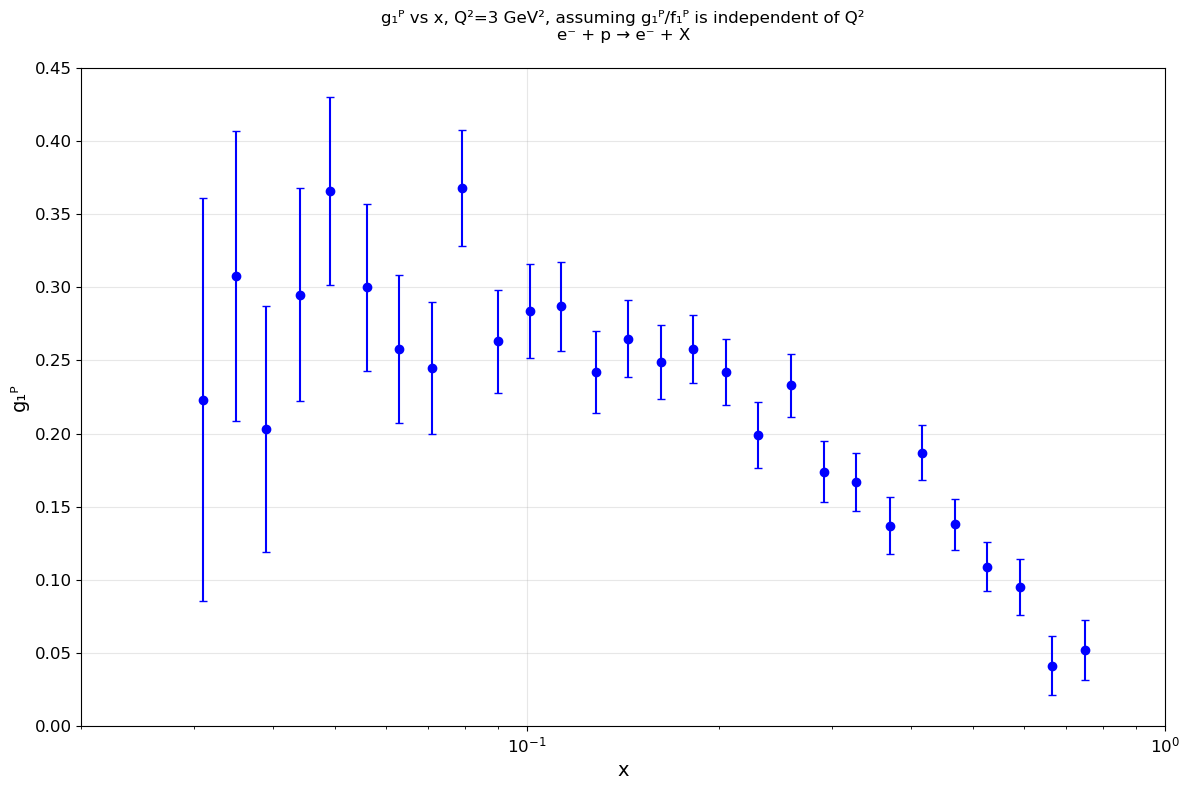

In [18]:
#Main and extra stuff
def plot_g1p_vs_x(data, combine_errors=True):
    """
    Create the G1^P vs x plot with error bars and logarithmic x-axis
    
    Parameters:
    data: pandas DataFrame with the physics data
    combine_errors: bool, whether to combine statistical and systematic errors
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Calculate combined errors if requested
    if combine_errors:
        # Combine statistical and systematic errors in quadrature
        error_upper = np.sqrt(data['stat +']**2 + data['sys +']**2)
        error_lower = np.sqrt(data['stat -']**2 + data['sys -']**2)
        yerr = [error_lower, error_upper]
    else:
        # Use only statistical errors
        yerr = [abs(data['stat -']), data['stat +']]
    
    # Create the scatter plot with error bars
    ax.errorbar(data['X'], data['G1'], 
                yerr=yerr,
                fmt='o',           # Circle markers
                color='blue',      # Blue color
                markersize=6,      # Marker size
                capsize=3,         # Error bar cap size
                capthick=1,        # Error bar cap thickness
                linewidth=1.5)     # Error bar line width
    
    # Always use logarithmic scale for x-axis
    ax.set_xscale('log')
    ax.set_xlim(0.02, 1.0)  # Adjust limits for log scale
    
    # Set labels and title
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('g₁ᴾ', fontsize=14)
    ax.set_title('g₁ᴾ vs x, Q²=3 GeV², assuming g₁ᴾ/f₁ᴾ is independent of Q²\ne⁻ + p → e⁻ + X', 
                 fontsize=12, pad=20)
    
    # Set y-axis limits
    ax.set_ylim(0.0, 0.45)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Improve the appearance
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='x', which='minor', labelsize=10)
    
    # Tight layout
    plt.tight_layout()
    
    return fig, ax

def main():
    """
    Main function to create the plot by parsing the CSV file
    """
    filepath = r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\E143_data\1...HEPData-ins375737-v1-csv 2\Table2.csv'
    
    # Try different parsing methods
    try:
        # Try the primary parsing method
        data = parse_csv_data(filepath)
        print("Data successfully parsed from CSV file using custom parser")
        print(f"Loaded {len(data)} data points")
        print(f"Columns: {list(data.columns)}")
        
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        print("Please verify the file path is correct.")
        return None, None
        
    except Exception as e:
        print(f"Error parsing with custom parser: {e}")
        try:
            # Try alternative method
            data = read_data_alternative(filepath)
            print("Data successfully parsed using alternative method")
        except Exception as e2:
            print(f"Error with alternative parser: {e2}")
            return None, None
    
    # Display first few rows for verification
    print("\nFirst 5 rows of parsed data:")
    print(data.head())
    
    # Create the plot with logarithmic x-axis
    fig, ax = plot_g1p_vs_x(data, combine_errors=True)
    
    # Display the plot
    plt.show()
    
    # Optionally save the plot
    # plt.savefig('g1p_vs_x_plot.png', dpi=300, bbox_inches='tight')
    
    return fig, ax

# Additional utility function to inspect the CSV file structure
def inspect_csv_file(filename=r'C:\Users\castl\Desktop\Internship stuff\Data_Lionel\Data_Lionel\E143_data\1...HEPData-ins375737-v1-csv 2\Table2.csv'):
    """
    Inspect the CSV file to understand its structure
    """
    print(f"Inspecting {filename}:")
    print("-" * 50)
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        
    print(f"Total lines: {len(lines)}")
    print("\nFirst 10 lines:")
    for i, line in enumerate(lines[:10]):
        print(f"{i+1:2}: {line.rstrip()}")
    
    print("\nLooking for data section:")
    for i, line in enumerate(lines):
        line = line.strip()
        if line and not line.startswith('#'):
            print(f"Data starts at line {i+1}: {line}")
            break

if __name__ == "__main__":
    main()